In [2]:
import cv2
import numpy as np
from skimage import io

def calculate_entropy(image):
    # Check if the image is already grayscale
    if len(image.shape) == 3:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    # Calculate histogram
    histogram, _ = np.histogram(gray_image, bins=256, range=(0, 255))

    # Normalize the histogram
    histogram = histogram / histogram.sum()

    # Calculate entropy
    entropy = -np.sum(histogram * np.log2(histogram + 1e-10))  # Adding a small value to avoid log(0)
    return entropy

# Load the image
image_path =r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"
image = io.imread(image_path)

# Calculate entropy
entropy_value = calculate_entropy(image)
print(f'Entropy of the image: {entropy_value}')


Entropy of the image: 7.994704715001069


In [3]:
'''CORRELATION MEASUREMENT'''
import cv2
import numpy as np
from scipy.stats import pearsonr

# Function to read and flatten the image
def load_image_as_vector(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Flatten the image into a 1D vector
    return image.flatten()

# Function to calculate Pearson correlation between two images
def calculate_image_correlation(image_path1, image_path2):
    # Load images as vectors
    image1 = load_image_as_vector(image_path1)
    image2 = load_image_as_vector(image_path2)
    
    # Ensure both images have the same number of pixels
    if image1.shape != image2.shape:
        raise ValueError("The images must have the same dimensions.")
    
    # Compute Pearson correlation coefficient
    correlation, _ = pearsonr(image1, image2)
    return correlation

# Example usage
image1_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"
image2_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg"

correlation = calculate_image_correlation(image1_path, image2_path)
print(f"Pearson correlation coefficient between the two images: {correlation}")


Pearson correlation coefficient between the two images: 0.0036348244684901764


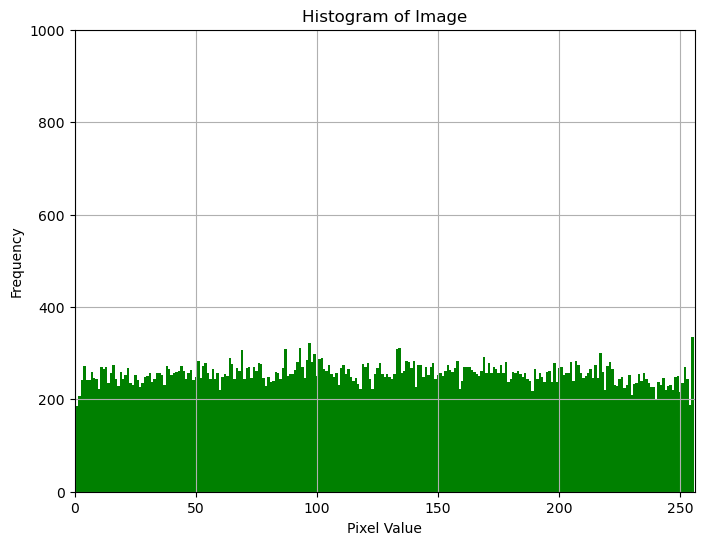

In [4]:
import cv2
import matplotlib.pyplot as plt

# Function to plot frequency histogram of a grayscale image
def plot_histogram(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Plot the frequency histogram with a bar graph
    plt.figure(figsize=(8, 6))
    plt.bar(range(256), histogram.flatten(), width=1, color='green')
    plt.title('Histogram of Image')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.ylim([0, 1000])
    plt.grid(True)
    plt.show()

# Path to the uploaded image
image_path=r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"
# Plot histogram for the uploaded image
plot_histogram(image_path)


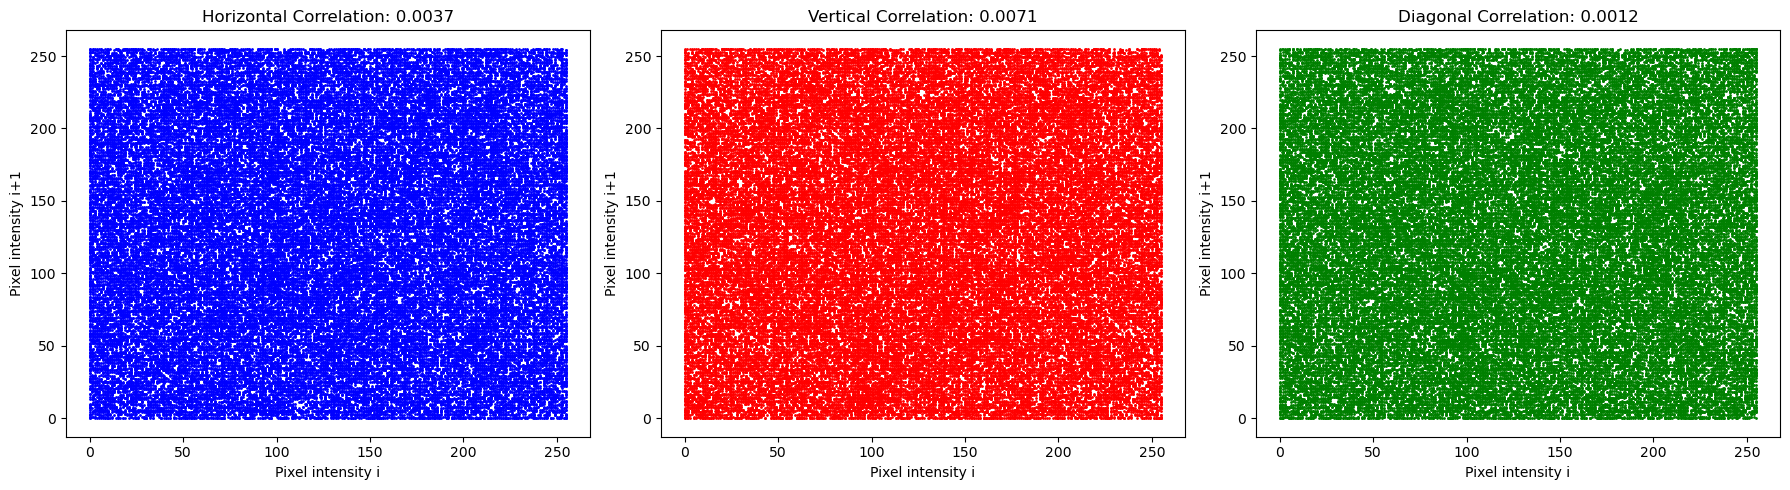

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_correlations(image_path):
    # Load and convert image to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Image not found.")
        return
    
    # Get image dimensions
    height, width = image.shape

    # Horizontal pixel pairs
    horizontal_pixels = image[:, :-1].flatten()  # all rows, excluding last column
    horizontal_pairs = image[:, 1:].flatten()    # all rows, excluding first column

    # Vertical pixel pairs
    vertical_pixels = image[:-1, :].flatten()    # excluding last row
    vertical_pairs = image[1:, :].flatten()      # excluding first row

    # Diagonal pixel pairs (bottom-right direction)
    diagonal_pixels = image[:-1, :-1].flatten()  # excluding last row and column
    diagonal_pairs = image[1:, 1:].flatten()     # excluding first row and column

    # Calculate correlations
    horizontal_correlation = np.corrcoef(horizontal_pixels, horizontal_pairs)[0, 1]
    vertical_correlation = np.corrcoef(vertical_pixels, vertical_pairs)[0, 1]
    diagonal_correlation = np.corrcoef(diagonal_pixels, diagonal_pairs)[0, 1]

    # Plot results
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    # Horizontal correlation scatter plot
    axs[0].scatter(horizontal_pixels, horizontal_pairs, s=1, color="blue")
    axs[0].set_title(f"Horizontal Correlation: {horizontal_correlation:.4f}")
    axs[0].set_xlabel("Pixel intensity i")
    axs[0].set_ylabel("Pixel intensity i+1")

    # Vertical correlation scatter plot
    axs[1].scatter(vertical_pixels, vertical_pairs, s=1, color="red")
    axs[1].set_title(f"Vertical Correlation: {vertical_correlation:.4f}")
    axs[1].set_xlabel("Pixel intensity i")
    axs[1].set_ylabel("Pixel intensity i+1")

    # Diagonal correlation scatter plot
    axs[2].scatter(diagonal_pixels, diagonal_pairs, s=1, color="green")
    axs[2].set_title(f"Diagonal Correlation: {diagonal_correlation:.4f}")
    axs[2].set_xlabel("Pixel intensity i")
    axs[2].set_ylabel("Pixel intensity i+1")

    plt.tight_layout()
    plt.show()

# Example usage
plot_correlations(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg")


In [12]:
'''NPCR ANALYSIS'''
import cv2
import numpy as np

def calculate_npcr(image1_path, image2_path):
    # Load the images as grayscale
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)  # Read the first image
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)  # Read the second image

    # Check if the images have the same shape
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions.")  # Ensure images are comparable

    # Compute the pixel difference (0 if same, 1 if different)
    diff_matrix = np.where(img1 != img2, 1, 0)  # Identify differing pixels

    # Calculate NPCR
    npcr_value = (np.sum(diff_matrix) / img1.size) * 100  # Percentage of different pixels

    return npcr_value

# Example usage
image1_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg"
image2_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"
npcr = calculate_npcr(image1_path, image2_path)
print(f"NPCR: {npcr:.6f}%")  # Display NPCR with six decimal places


NPCR: 99.652100%


In [7]:
'''CHI SQUARE TEST'''
import cv2
import numpy as np
from scipy.stats import chisquare

# Load the image and convert to grayscale (if not already in grayscale)
image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg" # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Flatten the image to create a 1D array of pixel intensities
pixel_values = image.flatten()

# Get the histogram of the pixel intensities
# bins=256 for grayscale images with pixel values ranging from 0 to 255
observed_counts, bin_edges = np.histogram(pixel_values, bins=256, range=(0, 256))

# Define the expected counts for a uniform distribution
total_pixels = pixel_values.size
expected_counts = np.full_like(observed_counts, total_pixels / 256)

# Perform the Chi-Square test
chi_square_statistic, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Display results
print(f"Chi-Square Statistic: {chi_square_statistic}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The pixel intensity distribution is significantly different from uniform (reject H0).")
else:
    print("The pixel intensity distribution is not significantly different from uniform (fail to reject H0).")


Chi-Square Statistic: 486.921875
The pixel intensity distribution is significantly different from uniform (reject H0).


In [8]:
'''KEY SPACE ANALYSIS '''
import numpy as np
import cv2
import hashlib
from tqdm import tqdm

# Load the original image
image_path =r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set key space parameters
key_space_size = 2 ** 128  # Example key space size; adjust for your encryption algorithm

# Hash function to generate a distinct key for testing
def generate_key(seed):
    return hashlib.sha256(seed.encode()).digest()

# Encrypt image function (dummy example)
def encrypt_image(image, key):
    # Here you would use the actual encryption function. Below is a dummy example.
    np.random.seed(int.from_bytes(key[:4], 'big'))  # Seed RNG with a subset of the key
    noise = np.random.randint(0, 256, image.shape, dtype=np.uint8)
    encrypted_image = cv2.bitwise_xor(image, noise)
    return encrypted_image

# Key space analysis
def key_space_analysis(original_image, num_keys_to_test=10000):
    unique_encrypted_images = set()
    
    for i in tqdm(range(num_keys_to_test), desc="Analyzing Key Space"):
        # Generate a unique key based on the loop index
        key = generate_key(str(i))
        
        # Encrypt the image with the generated key
        encrypted_image = encrypt_image(original_image, key)
        
        # Calculate a unique identifier for the encrypted image (hash)
        encrypted_hash = hashlib.sha256(encrypted_image).hexdigest()
        
        # Add the hash to the set of unique encrypted images
        unique_encrypted_images.add(encrypted_hash)

    # Calculate key space strength based on unique images
    key_uniqueness_ratio = len(unique_encrypted_images) / num_keys_to_test
    effective_key_space_size = int(key_space_size * key_uniqueness_ratio)

    #print(f"Total keys tested: {num_keys_to_test}")
    #print(f"Unique encrypted images: {len(unique_encrypted_images)}")
    #print(f"Key uniqueness ratio: {key_uniqueness_ratio:.4f}")
    #print(f"Effective key space size: {effective_key_space_size}")
    
    if effective_key_space_size>2**(100):
        print("Test passed")
    
# Run key space analysis
key_space_analysis(original_image)

Analyzing Key Space: 100%|█████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 5007.69it/s]

Test passed


SSIM Index: 0.006674071212769925


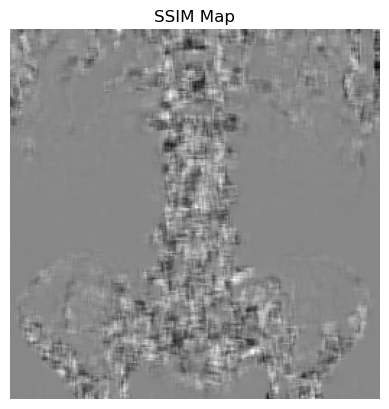

In [9]:
'''SSIM'''
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# Load the two images (they should be grayscale images)
img1 = cv2.imread(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg", cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    raise ValueError("One or both image paths are incorrect.")

# Ensure both images are the same size
if img1.shape != img2.shape:
    raise ValueError("Images must be the same size to compute SSIM.")

# Calculate SSIM between the two images
ssim_index, ssim_map = ssim(img1, img2, full=True)

# Display SSIM index
print(f"SSIM Index: {ssim_index}")

# Display SSIM map
plt.imshow(ssim_map, cmap='gray')
plt.title("SSIM Map")
plt.axis("off")
plt.show()

In [10]:
'''UACI'''
from PIL import Image
import numpy as np

def calculate_uaci(image1, image2):
    """
    Calculate the Unified Average Changing Intensity (UACI) between two images.

    Args:
        image1 (np.ndarray): Original grayscale image as a NumPy array.
        image2 (np.ndarray): Encrypted or modified grayscale image as a NumPy array.

    Returns:
        float: UACI value in percentage.
    """
    if not isinstance(image1, np.ndarray) or not isinstance(image2, np.ndarray):
        raise TypeError("Both inputs must be NumPy arrays.")
    if image1.shape != image2.shape:
        raise ValueError("Both images must have the same dimensions.")

    # Calculate absolute difference and UACI
    diff = np.abs(image1.astype(np.int16) - image2.astype(np.int16))
    uaci = np.mean(diff) / 255 * 100  # Mean normalization and conversion to percentage
    return uaci

# Example usage
original_image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis.jpg"
encrypted_image_path = r"C:\Users\srisu\Encryption Project\pelvis_results\pelvis_encrypted.jpg"

try:
    # Load images as grayscale and convert to NumPy arrays
    original_image = np.array(Image.open(original_image_path).convert('L'))
    encrypted_image = np.array(Image.open(encrypted_image_path).convert('L'))

    # Calculate UACI
    uaci_value = calculate_uaci(original_image, encrypted_image)
    print(f"UACI: {uaci_value:.6f}%")  # Increased decimal points to 6
except FileNotFoundError as e:
    print(f"Error: File not found. {e}")
except Exception as e:
    print(f"An error occurred: {e}")

UACI: 33.859032%


In [11]:
'''PSNR'''
import cv2
import numpy as np

def calculate_psnr(img1, img2):
    # Ensure both images have the same size
    if img1.shape != img2.shape:
        raise ValueError("Images must be the same size to calculate PSNR.")

    # Calculate Mean Squared Error (MSE)
    mse = np.mean((img1 - img2) ** 2)
    
    # If MSE is zero, the images are identical
    if mse == 0:
        return float('inf')
    
    # Calculate PSNR
    max_pixel = 255.0  # Maximum possible pixel value for 8-bit images
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr

# Load two grayscale images for comparison
img1 = cv2.imread(r"C:\Users\srisu\Encryption Project\skeleton_results\skeleton.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(r"C:\Users\srisu\Encryption Project\skeleton_results\skeleton_encrypted.jpg", cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    raise ValueError("One or both image paths are incorrect.")

# Calculate PS
psnr_value = calculate_psnr(img1, img2)
print(f"PSNR: {psnr_value:.2f} dB")

PSNR: 27.92 dB
